In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


```
1. Leer el archivo Retail_Invoices.xlsx y realizar un análisis de calidad de datos, para
definir la calidad de la data entregada considerando valores anómalos, valores
faltantes, etc. Limpia lo que sea necesario y realiza un análisis exploratorio de los
datos considerando gráficos de distribuciones y correlaciones entre estos.

```

In [72]:
df= pd.read_excel('Retail_Invoices.xlsx')
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [73]:
print(df.head())

  InvoiceNo InvoiceDate  CustomerID  Quantity  price_total  StockCode
0    536365  2010-12-01       17850        40       139.12          7
1    536366  2010-12-01       17850        12        22.20          2
2    536367  2010-12-01       13047        83       278.73         12
3    536368  2010-12-01       13047        15        70.05          4
4    536369  2010-12-01       13047         3        17.85          1


In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB
None


In [75]:
print(df.describe())

                         InvoiceDate    CustomerID      Quantity  \
count                          22190  22190.000000  22190.000000   
mean   2011-06-29 05:59:15.223073536  15238.498738    221.130599   
min              2010-12-01 00:00:00  12346.000000 -80995.000000   
25%              2011-03-29 00:00:00  13755.000000     30.000000   
50%              2011-07-08 00:00:00  15136.000000    120.000000   
75%              2011-10-10 00:00:00  16746.000000    254.000000   
max              2011-12-09 00:00:00  18287.000000  80995.000000   
std                              NaN   1733.149624   1170.215301   

         price_total     StockCode  
count   22190.000000  22190.000000  
mean      374.045327     18.333889  
min   -168469.600000      1.000000  
25%        87.962500      3.000000  
50%       241.505000     12.000000  
75%       418.022500     24.000000  
max    168469.600000    542.000000  
std      2018.482869     23.892111  


In [76]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'price_total',
       'StockCode'],
      dtype='object')

In [77]:
df=df.drop_duplicates()
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [78]:
df = df.dropna()
df

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1
...,...,...,...,...,...,...
22185,C581484,2011-12-09,16446,-80995,-168469.60,1
22186,C581490,2011-12-09,14397,-23,-32.53,2
22187,C581499,2011-12-09,15498,-1,-224.69,1
22188,C581568,2011-12-09,15311,-5,-54.75,1


In [79]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Calcular el rango intercuartílico (IQR) para columnas numéricas
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para quitar valores atípicos en columnas numéricas
df_sin_outliers = df[~((df_numeric < lower_limit) | (df_numeric > upper_limit)).any(axis=1)]

# Visualizar el DataFrame resultante sin outliers
print(df_sin_outliers)

      InvoiceNo InvoiceDate  CustomerID  Quantity  price_total  StockCode
0        536365  2010-12-01       17850        40       139.12          7
1        536366  2010-12-01       17850        12        22.20          2
2        536367  2010-12-01       13047        83       278.73         12
3        536368  2010-12-01       13047        15        70.05          4
4        536369  2010-12-01       13047         3        17.85          1
...         ...         ...         ...       ...          ...        ...
22184   C581470  2011-12-08       17924        -4        -8.32          1
22186   C581490  2011-12-09       14397       -23       -32.53          2
22187   C581499  2011-12-09       15498        -1      -224.69          1
22188   C581568  2011-12-09       15311        -5       -54.75          1
22189   C581569  2011-12-09       17315        -6        -7.50          2

[19213 rows x 6 columns]


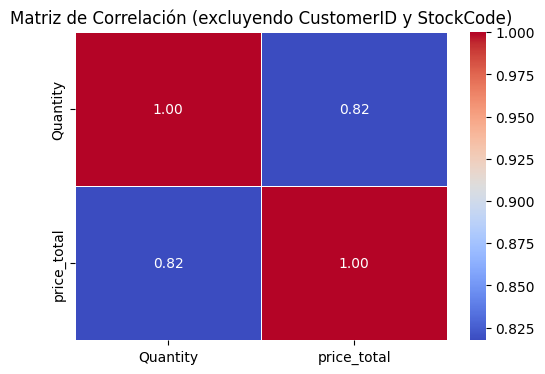

In [80]:
# Explorar correlaciones entre variables numéricas excluyendo CustomerID y StockCode
correlation_matrix = df_sin_outliers[['Quantity', 'price_total']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación (excluyendo CustomerID y StockCode)')
plt.show()


```
2. Generar variables para la segmentación. Notar que la granularidad de la data es por
boleta y se necesita segmentar clientes, por lo que es necesario generar variables a
nivel de clientes. Se propone generar al menos RFM (Recencia, frecuencia y monto).
```

In [81]:
# Crear variables RFM para df_sin_outliers
df_rfm = pd.DataFrame()

# Calcular la Recencia (diferencia entre la fecha actual y la última compra del cliente)
ultima_compra = df_sin_outliers['InvoiceDate'].max()
df_rfm['Recencia'] = (ultima_compra - df_sin_outliers.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Calcular la Frecuencia (número total de compras realizadas por el cliente)
df_rfm['Frecuencia'] = df_sin_outliers.groupby('CustomerID')['InvoiceNo'].nunique()

# Calcular el Monto (suma total de dinero gastado por el cliente)
df_rfm['Monto'] = df_sin_outliers.groupby('CustomerID')['price_total'].sum()

# Visualizar las primeras filas del nuevo dataframe RFM
print(df_rfm.head())


            Recencia  Frecuencia    Monto
CustomerID                               
12347              2           6  3015.68
12348             75           2   677.00
12350            310           1   334.40
12352             36          10  2009.21
12353            204           1    89.00


```
3. Realizar un análisis exploratorio y las transformaciones necesarias a las nuevas
variables.
```

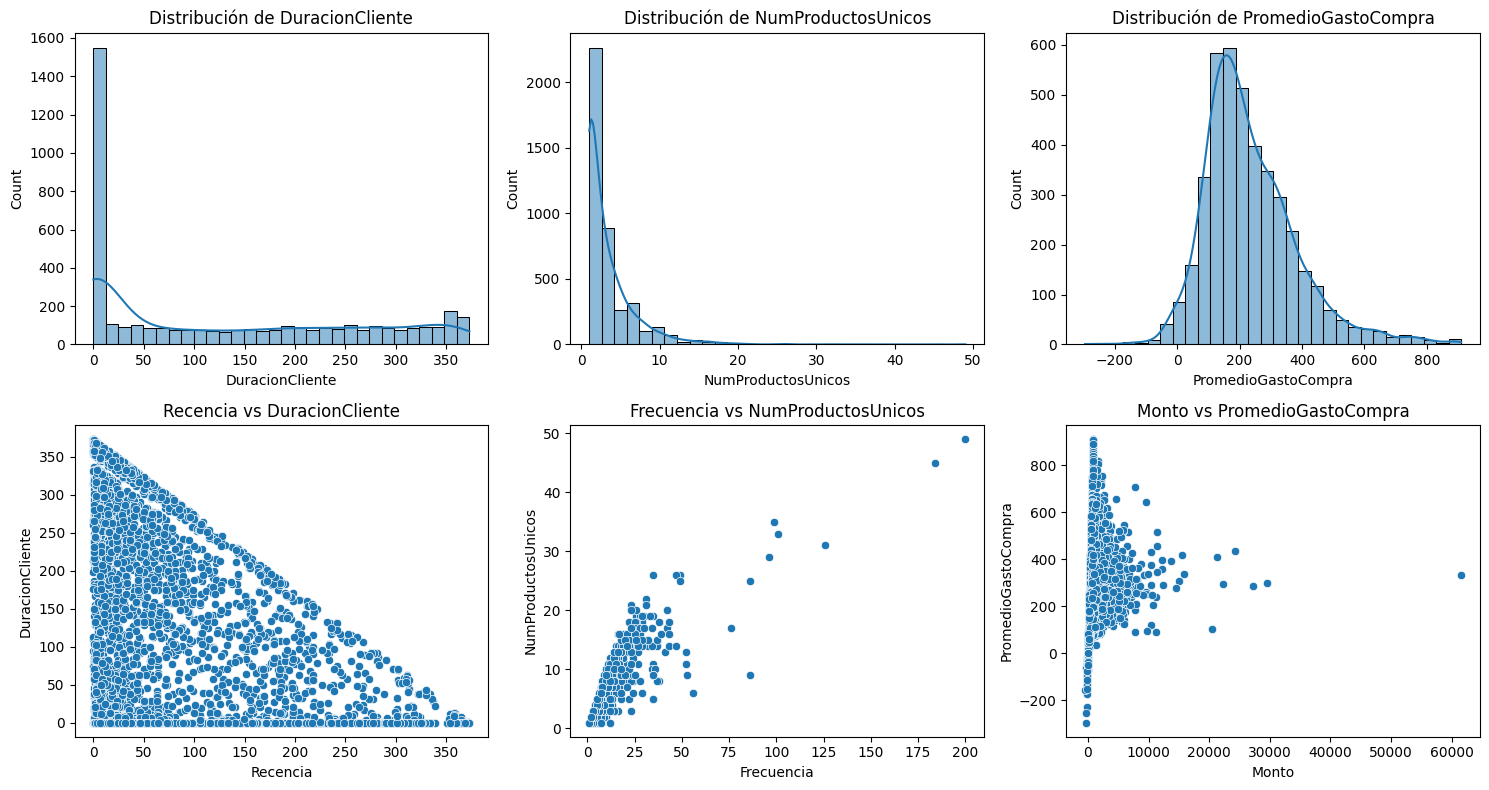

In [82]:
# Añadir nuevas variables al DataFrame df_rfm
df_rfm['DuracionCliente'] = (df_sin_outliers.groupby('CustomerID')['InvoiceDate'].max() - df_sin_outliers.groupby('CustomerID')['InvoiceDate'].min()).dt.days
df_rfm['NumProductosUnicos'] = df_sin_outliers.groupby('CustomerID')['StockCode'].nunique()
df_rfm['PromedioGastoCompra'] = df_rfm['Monto'] / df_rfm['Frecuencia']

# Visualizar distribuciones de las nuevas variables
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.histplot(df_rfm['DuracionCliente'], bins=30, kde=True).set_title('Distribución de DuracionCliente')

plt.subplot(2, 3, 2)
sns.histplot(df_rfm['NumProductosUnicos'], bins=30, kde=True).set_title('Distribución de NumProductosUnicos')

plt.subplot(2, 3, 3)
sns.histplot(df_rfm['PromedioGastoCompra'], bins=30, kde=True).set_title('Distribución de PromedioGastoCompra')

# Visualizar relaciones entre variables
plt.subplot(2, 3, 4)
sns.scatterplot(x='Recencia', y='DuracionCliente', data=df_rfm).set_title('Recencia vs DuracionCliente')

plt.subplot(2, 3, 5)
sns.scatterplot(x='Frecuencia', y='NumProductosUnicos', data=df_rfm).set_title('Frecuencia vs NumProductosUnicos')

plt.subplot(2, 3, 6)
sns.scatterplot(x='Monto', y='PromedioGastoCompra', data=df_rfm).set_title('Monto vs PromedioGastoCompra')

plt.tight_layout()
plt.show()

```
4. Aplicar al menos 2 algoritmos de clustering. Buscar el número indicado de clusters
que pueden tener y visualizar los cluster resultantes de los algoritmos.
```

Índice de Silueta para K-Means: 0.3233693875049411
Índice de Silueta para Agrupamiento Jerárquico: 0.30068064053277627


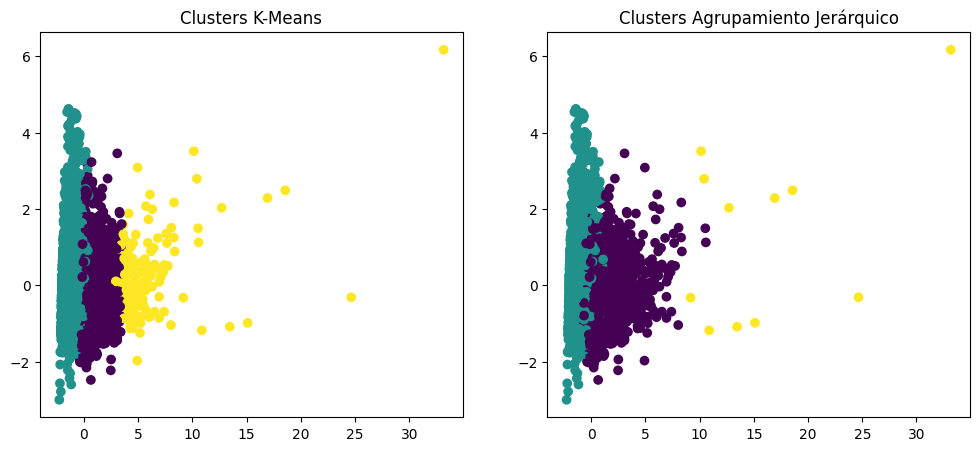

In [83]:
# Seleccionar las variables para el clustering
variables_clustering = ['Recencia', 'Frecuencia', 'Monto', 'DuracionCliente', 'NumProductosUnicos', 'PromedioGastoCompra']
df_cluster = df_rfm[variables_clustering]

# Escalar las variables para facilitar el clustering
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Aplicar k-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_rfm['Cluster_KMeans'] = kmeans.fit_predict(df_cluster_scaled)

# Aplicar agrupamiento jerárquico
agglomerative = AgglomerativeClustering(n_clusters=3)
df_rfm['Cluster_Agglomerative'] = agglomerative.fit_predict(df_cluster_scaled)

# Calcular el índice de silueta para k-means
silhouette_kmeans = silhouette_score(df_cluster_scaled, df_rfm['Cluster_KMeans'])
print(f"Índice de Silueta para K-Means: {silhouette_kmeans}")

# Calcular el índice de silueta para agrupamiento jerárquico
silhouette_agglomerative = silhouette_score(df_cluster_scaled, df_rfm['Cluster_Agglomerative'])
print(f"Índice de Silueta para Agrupamiento Jerárquico: {silhouette_agglomerative}")

# Visualizar los clusters utilizando PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
df_cluster_pca = pca.fit_transform(df_cluster_scaled)

# Visualizar los clusters resultantes de k-means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_cluster_pca[:, 0], df_cluster_pca[:, 1], c=df_rfm['Cluster_KMeans'], cmap='viridis')
plt.title('Clusters K-Means')

# Visualizar los clusters resultantes de agrupamiento jerárquico
plt.subplot(1, 2, 2)
plt.scatter(df_cluster_pca[:, 0], df_cluster_pca[:, 1], c=df_rfm['Cluster_Agglomerative'], cmap='viridis')
plt.title('Clusters Agrupamiento Jerárquico')

plt.show()


In [84]:
# Calcular el índice de silueta para k-means
silhouette_kmeans = silhouette_score(df_cluster_scaled, df_rfm['Cluster_KMeans'])
print(f"Índice de Silueta para K-Means: {silhouette_kmeans}")

# Calcular el índice de silueta para agrupamiento jerárquico
silhouette_agglomerative = silhouette_score(df_cluster_scaled, df_rfm['Cluster_Agglomerative'])
print(f"Índice de Silueta para Agrupamiento Jerárquico: {silhouette_agglomerative}")


Índice de Silueta para K-Means: 0.3233693875049411
Índice de Silueta para Agrupamiento Jerárquico: 0.30068064053277627


```
5. Evaluar la calidad de los clustering de forma numérica y realizar una explicación de
cada segmento asignándoles un nombre descriptivo.
```

In [85]:
# Definir nombres descriptivos para los segmentos
def asignar_nombre_descriptivo(cluster):
    if cluster == 0:
        return "Clientes Activos y Leales"
    elif cluster == 1:
        return "Clientes Inactivos con Gasto Alto"
    elif cluster == 2:
        return "Clientes Nuevos o Poco Frecuentes con Gasto Moderado"
    else:
        return "Otro"

# Asignar nombres descriptivos a los clusters para ambos algoritmos
df_rfm['Nombre_Cluster_KMeans'] = df_rfm['Cluster_KMeans'].apply(asignar_nombre_descriptivo)
df_rfm['Nombre_Cluster_Agglomerative'] = df_rfm['Cluster_Agglomerative'].apply(asignar_nombre_descriptivo)

# Visualizar la distribución de clientes en cada cluster
print("Distribución de Clientes en Clusters (K-Means):")
print(df_rfm['Nombre_Cluster_KMeans'].value_counts())

print("\nDistribución de Clientes en Clusters (Agrupamiento Jerárquico):")
print(df_rfm['Nombre_Cluster_Agglomerative'].value_counts())


Distribución de Clientes en Clusters (K-Means):
Nombre_Cluster_KMeans
Clientes Inactivos con Gasto Alto                       2355
Clientes Activos y Leales                               1630
Clientes Nuevos o Poco Frecuentes con Gasto Moderado     159
Name: count, dtype: int64

Distribución de Clientes en Clusters (Agrupamiento Jerárquico):
Nombre_Cluster_Agglomerative
Clientes Inactivos con Gasto Alto                       2264
Clientes Activos y Leales                               1869
Clientes Nuevos o Poco Frecuentes con Gasto Moderado      11
Name: count, dtype: int64
